### **Code** : **PV Smart-Metering Basic Analysis of variables and Regression Analysis**
- Writer : Donghyeon Kim
- Date : 2022.07.26
- Data : 태양광 사용가구 '김OO'
- Reason : 1,440개의 행(60분 X 24시간)을 가장 많이 지니고 있는 가구이므로 선정함.

<hr>

### **0. Running the library and setting up the foundation**

In [1]:
# 1. 라이브러리 실행
from pathlib import Path
import os
import pandas as pd
import numpy as np 
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# 2. 파일의 상위-상위 경로 설정
os_root = Path(os.path.join(os.getcwd(), '4. variable_and_reg_analysis.ipynb'))
root = os_root.parent.parent

#### **User Data**

In [3]:
# 3. 사용자 데이터 호출
# User data 폴더
user_folder_root = os.path.join(root, 'data_revised_hour')

# xlsx 파일 이름
xlsx_name = user_folder_root + '\\' + '김OO_dataset_revised_hour.xlsx'

# 데이터 호출
df_user = pd.read_excel(xlsx_name)

In [4]:
df_user.head(24)

,date,year,month,day,hour,그리드 소비(kWh),수출 된 에너지(kWh),에너지 수율(kWh)
0,2021-03-01 00:59:00,2021,3,1,0,0.200001,0.000000,0.000000
1,2021-03-01 01:59:00,2021,3,1,1,0.250000,0.000000,0.000000
2,2021-03-01 02:59:00,2021,3,1,2,0.210003,0.000000,0.000000
3,2021-03-01 03:59:00,2021,3,1,3,0.180000,0.000000,0.000000
4,2021-03-01 04:59:00,2021,3,1,4,0.190002,0.000000,0.000000
5,2021-03-01 05:59:00,2021,3,1,5,0.200001,0.000000,0.000000
6,2021-03-01 06:59:00,2021,3,1,6,0.299999,0.000000,0.000000
7,2021-03-01 07:59:00,2021,3,1,7,0.270000,0.000000,0.000000
8,2021-03-01 08:59:00,2021,3,1,8,0.399998,0.000000,0.000000
9,2021-03-01 09:59:00,2021,3,1,9,0.219997,0.000000,0.050003


In [5]:
# Merge를 위한 column filtering
df_user_filter = df_user.drop(['date'], axis = 1)

In [6]:
df_user_filter.head(24)

,year,month,day,hour,그리드 소비(kWh),수출 된 에너지(kWh),에너지 수율(kWh)
0,2021,3,1,0,0.200001,0.000000,0.000000
1,2021,3,1,1,0.250000,0.000000,0.000000
2,2021,3,1,2,0.210003,0.000000,0.000000
3,2021,3,1,3,0.180000,0.000000,0.000000
4,2021,3,1,4,0.190002,0.000000,0.000000
5,2021,3,1,5,0.200001,0.000000,0.000000
6,2021,3,1,6,0.299999,0.000000,0.000000
7,2021,3,1,7,0.270000,0.000000,0.000000
8,2021,3,1,8,0.399998,0.000000,0.000000
9,2021,3,1,9,0.219997,0.000000,0.050003


<hr>

### **1. Basic Analysis of variables by data**

#### **<Data 1 : Weather Data>**

#### **1) Data Pre-processing**

In [7]:
# weather data 폴더
weather_folder_root = os.path.join(root, 'data_weather')

# csv 파일 이름
csv_name = weather_folder_root + '\\' + 'keei_ldaps.csv'

# 데이터 호출
df_weather = pd.read_csv(csv_name, encoding='cp949')

In [8]:
# 데이터 정제
df_weather['dt'] = pd.to_datetime(df_weather['dt'], format='%Y/%m/%d %H:%M:%S')
df_weather['year'] = df_weather['dt'].dt.year
df_weather['month'] = df_weather['dt'].dt.month
df_weather['day'] = df_weather['dt'].dt.day
df_weather['hour'] = df_weather['dt'].dt.hour

In [9]:
# 태양광 사용 가구 : '김OO'
df_weather_use = df_weather[df_weather.owner == '김OO']

In [10]:
# Data Merge
df_weather_use = pd.merge(df_weather_use, df_user_filter, how='left', on=['year', 'month', 'day', 'hour'])

In [11]:
# Column 이름 변경
df_weather_use.rename(columns={'그리드 소비(kWh)': 'grid_kWh', '수출 된 에너지(kWh)': 'export_kWh', '에너지 수율(kWh)': 'yield_kWh'}, inplace=True)

In [12]:
df_weather_use.drop(['owner', 'id_hh', 'id_hs'], axis=1).tail(10)

,dt,temperature,uws_10m,vws_10m,ghi,precipitation,relative_humidity_1p5m,specific_humidity_1p5m,year,month,day,hour,grid_kWh,export_kWh,yield_kWh
13840,2022-04-30 15:00:00+09:00,289.807922,1.103254,2.136642,243.770538,0.0,75.599068,0.006213,2022,4,30,15,0.000000,0.370117,0.680176
13841,2022-04-30 16:00:00+09:00,290.679688,3.716064,0.633899,284.969421,0.0,70.625931,0.006306,2022,4,30,16,0.000000,0.319824,0.470215
13842,2022-04-30 17:00:00+09:00,289.007690,3.104170,1.623195,331.664551,0.0,78.621765,0.005859,2022,4,30,17,0.020020,0.130127,0.370117
13843,2022-04-30 18:00:00+09:00,287.392883,2.541556,1.322166,187.572693,0.0,80.893768,0.005859,2022,4,30,18,0.100098,0.070068,0.180176
13844,2022-04-30 19:00:00+09:00,285.536194,1.803355,2.358898,50.007076,0.0,84.606339,0.005744,2022,4,30,19,0.709961,0.000000,0.000000
13845,2022-04-30 20:00:00+09:00,284.207703,1.945932,1.498594,1.366211,0.0,87.228836,0.005584,2022,4,30,20,0.290039,0.000000,0.000000
13846,2022-04-30 21:00:00+09:00,282.821838,0.995493,1.326086,0.000000,0.0,85.965973,0.005168,2022,4,30,21,0.320068,0.000000,0.000000
13847,2022-04-30 22:00:00+09:00,281.902527,0.671311,1.957892,0.000000,0.0,83.123375,0.005127,2022,4,30,22,0.260010,0.000000,0.000000
13848,2022-04-30 23:00:00+09:00,281.104187,0.343318,2.047524,0.000000,0.0,80.482849,0.004883,2022,4,30,23,0.209961,0.000000,0.000000
13849,2022-05-01 00:00:00+09:00,280.501892,0.750398,1.590288,0.000000,0.0,77.866310,0.004686,2022,5,1,0,NaN,NaN,NaN


In [13]:
# 데이터에 해당하는 연도 / 21년도에 해당하는 월 / 22년도에 해당하는 월
# 데이터 기간 : 2021.03 ~ 2022.04
d_year = [2021, 2022]
d_month_21 = range(3, 12+1)
d_month_22 = range(1, 4+1)

In [14]:
# 2021.03 ~ 2022.04 기간에 해당하는 데이터만 필터링
for y in d_year:
    count = 0
    if y == 2021:
        for ma in d_month_21:
            temp = df_weather_use[(df_weather_use.year == y) & (df_weather_use.month == ma)]
            if count == 0:
                result = temp
                count += 1
            else:
                result = pd.concat([result, temp])
    elif y == 2022:
        for mb in d_month_22:
            temp = df_weather_use[(df_weather_use.year == y) & (df_weather_use.month == mb)]
            result = pd.concat([result, temp])

df_weather_use = result

In [15]:
# 온도(temperature) 변환
# 기존 형태 : Kelvin(켈빈 온도) -> 변경하고자 하는 형태 : 섭씨 온도
# 섭씨 온도와 켈빈 온도 관계식 : 0(C) + 273.15(K) = 273.15(K)

df_weather_use.temperature = df_weather_use.temperature - 273.15

In [16]:
df_weather_use.drop(['owner', 'id_hh', 'id_hs'], axis=1).head(24)

,dt,temperature,uws_10m,vws_10m,ghi,precipitation,relative_humidity_1p5m,specific_humidity_1p5m,year,month,day,hour,grid_kWh,export_kWh,yield_kWh
3625,2021-03-01 00:00:00+09:00,10.322687,0.858208,0.041718,0.000000,0.000000,60.644928,0.004421,2021,3,1,0,0.200001,0.000000,0.000000
3626,2021-03-01 01:00:00+09:00,10.029108,0.135828,-1.085083,0.000000,0.000000,56.432068,0.004188,2021,3,1,1,0.250000,0.000000,0.000000
3627,2021-03-01 02:00:00+09:00,9.844873,0.362611,-0.180941,0.000000,0.000000,62.081512,0.004626,2021,3,1,2,0.210003,0.000000,0.000000
3628,2021-03-01 03:00:00+09:00,9.587915,-0.411156,0.997797,0.000000,0.000000,56.335152,0.004261,2021,3,1,3,0.180000,0.000000,0.000000
3629,2021-03-01 04:00:00+09:00,9.564752,-0.462263,-0.222837,0.000000,0.000000,61.451012,0.004599,2021,3,1,4,0.190002,0.000000,0.000000
3630,2021-03-01 05:00:00+09:00,9.363092,0.721948,-2.010242,0.000000,0.000000,64.313083,0.004559,2021,3,1,5,0.200001,0.000000,0.000000
3631,2021-03-01 06:00:00+09:00,8.639551,-1.163785,-1.346743,0.000000,2.439514,92.884331,0.005859,2021,3,1,6,0.299999,0.000000,0.000000
3632,2021-03-01 07:00:00+09:00,8.481317,-0.673493,-1.971651,0.000000,1.226685,94.962051,0.006039,2021,3,1,7,0.270000,0.000000,0.000000
3633,2021-03-01 08:00:00+09:00,8.494592,-1.207814,-0.468723,3.883789,1.170898,93.874001,0.005951,2021,3,1,8,0.399998,0.000000,0.000000
3634,2021-03-01 09:00:00+09:00,8.613031,-5.542665,1.533955,18.028790,0.239624,88.038452,0.005981,2021,3,1,9,0.219997,0.000000,0.050003


In [17]:
# 1분 단위 -> 1일 단위 데이터로 변경

print('1일 단위 데이터로 변경 시작')

# 1) 결과 Dictionary 생성
weather_time = {}
weather_time['year'] = [] # 연도
weather_time['month'] = [] # 월
weather_time['day'] = [] # 일
weather_time['temperature'] = [] # 온도
weather_time['uws_10m'] = [] # x축 풍속(10m 고도)
weather_time['vws_10m'] = [] # y축 풍속(10m 고도)
weather_time['ghi'] = [] # 일사량
weather_time['precipitation'] = [] # 강수량
weather_time['relative_humidity_1p5m'] = [] # 상대습도(1.5m 고도)
weather_time['specific_humidity_1p5m'] = [] # 절대습도(1.5m 고도)

# 2) 연도 필터링
u_year = df_weather_use.year.unique()

# 3) 연도 -> 월 -> 일 필터링 진행
for y in u_year:
    day_filter1 = df_weather_use[df_weather_use.year == y]
    
    # 월 필터링
    u_month = day_filter1.month.unique()
    
    for m in u_month:
        day_filter2 = day_filter1[day_filter1.month == m]
        
        # 일 필터링
        u_day = day_filter2.day.unique()
        
        for d in u_day:
            day_filter3 = day_filter2[day_filter2.day == d]
            
            # 4) 각 변수별 적절한 통계치 설정(mean, sum 등)
            tmp = np.mean(day_filter3.temperature)
            uws = np.mean(day_filter3.uws_10m)
            vws = np.mean(day_filter3.vws_10m)
            ghi = np.sum(day_filter3.ghi)
            prec = np.sum(day_filter3.precipitation)
            rel_humid = np.mean(day_filter3.relative_humidity_1p5m)
            spec_humid = np.mean(day_filter3.specific_humidity_1p5m)
            
            # 5) 결과 Dictionary에 값 대입
            weather_time['year'].append(y)
            weather_time['month'].append(m)
            weather_time['day'].append(d)
            weather_time['temperature'].append(tmp)
            weather_time['uws_10m'].append(uws)
            weather_time['vws_10m'].append(vws)
            weather_time['ghi'].append(ghi)
            weather_time['precipitation'].append(prec)
            weather_time['relative_humidity_1p5m'].append(rel_humid)
            weather_time['specific_humidity_1p5m'].append(spec_humid)
    
df_weather_final = pd.DataFrame(weather_time)
print('1일 단위 데이터로 변경 완료')

1일 단위 데이터로 변경 시작
1일 단위 데이터로 변경 완료


In [18]:
df_weather_final.loc[:, 'ym'] = df_weather_final.year.astype(str) + '/' + df_weather_final.month.astype(str)

In [19]:
df_weather_final.head(10)

,year,month,day,temperature,uws_10m,vws_10m,ghi,precipitation,relative_humidity_1p5m,specific_humidity_1p5m,ym
0,2021,3,1,8.919155,-1.736407,-0.162616,286.444231,57.434692,84.125891,0.005725,2021/3
1,2021,3,2,4.992891,0.314676,-2.043070,3881.830132,0.064941,69.686652,0.003057,2021/3
2,2021,3,3,5.865526,-0.040978,1.120929,4184.417839,0.000000,68.823934,0.003290,2021/3
3,2021,3,4,7.885524,-0.649182,1.242777,2709.822544,0.000000,65.751899,0.004110,2021/3
4,2021,3,5,9.139801,1.099768,-0.691771,4451.292202,0.000000,77.935111,0.004660,2021/3
5,2021,3,6,8.497615,-0.739030,-0.535698,2570.391235,0.000000,73.328921,0.004252,2021/3
6,2021,3,7,8.145973,0.575023,-0.228959,4423.887798,0.000000,65.821113,0.003503,2021/3
7,2021,3,8,8.444373,0.748325,-0.460115,4691.263340,0.000000,64.222694,0.003498,2021/3
8,2021,3,9,8.268987,1.356441,0.035522,4155.732078,0.000000,68.381816,0.003813,2021/3
9,2021,3,10,9.805317,0.527724,-0.261270,4781.561859,0.000000,68.913090,0.004243,2021/3


#### **2) Variable Analysis - '일사량'**

#### (1) Scatter Plot
- 일별 데이터 변환 : 'sum'

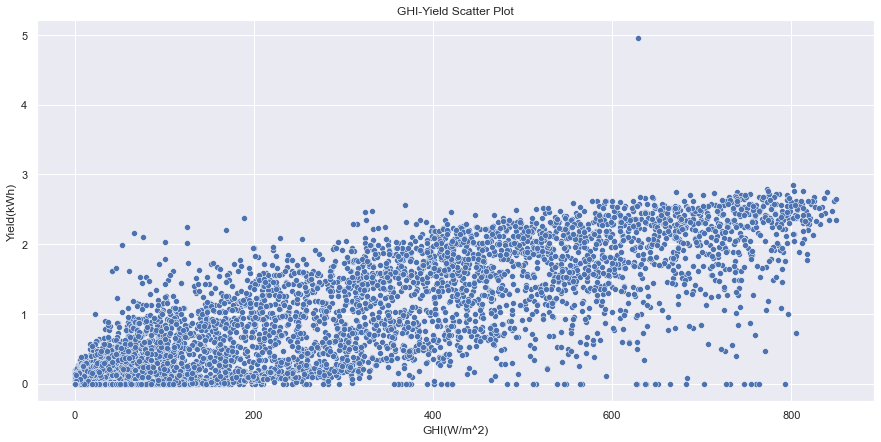

In [20]:
sns.set(rc={'figure.figsize':(15, 7)})
sns.scatterplot(x='ghi', y='yield_kWh', data=df_weather_use)
plt.title("GHI-Yield Scatter Plot")
plt.xlabel("GHI(W/m^2)")
plt.ylabel("Yield(kWh)")
plt.show()

#### (2) Boxplot

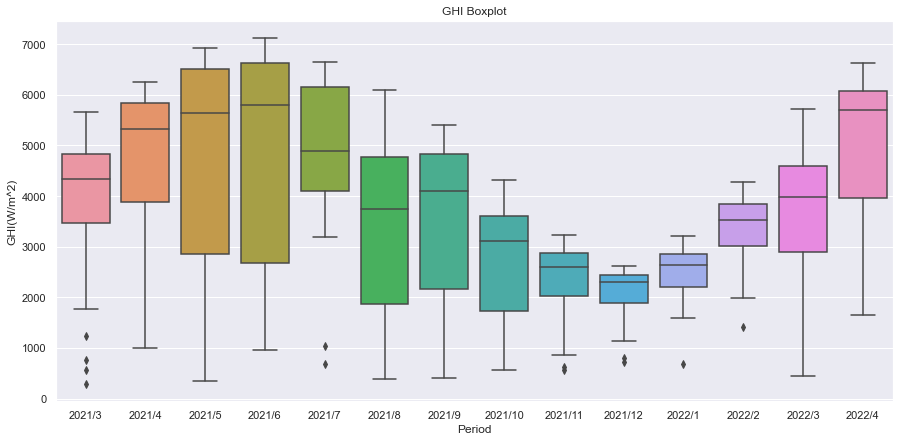

In [21]:
sns.set(rc={'figure.figsize':(15, 7)})
sns.boxplot(y='ghi', x='ym', data=df_weather_final)
plt.title("GHI Boxplot")
plt.xlabel("Period")
plt.ylabel("GHI(W/m^2)")
plt.show()

#### (3) Basic Statistics

In [22]:
# iloc method : 2021.03 ~ 2022.04
df_weather_final.groupby(['ym']).describe()['ghi'].iloc[3:, :]

,count,mean,std,min,25%,50%,75%,max
ym,,,,,,,,
2021/3,31.0,3860.592450,1511.614782,286.444231,3474.875992,4331.052973,4825.243501,5669.466400
2021/4,30.0,4688.293484,1614.793165,1003.089457,3874.977740,5332.333769,5843.313577,6257.655823
2021/5,31.0,4657.254080,2224.996207,349.386770,2863.840403,5632.127293,6506.701042,6928.879822
2021/6,30.0,4851.450606,2060.625286,954.334532,2668.818876,5798.527733,6638.787077,7121.581156
2021/7,31.0,4819.262413,1496.020200,683.126162,4108.256296,4895.473454,6153.457510,6654.776936
2021/8,31.0,3399.380657,1768.786948,385.297813,1861.837170,3737.006737,4772.452767,6087.984177
2021/9,30.0,3529.729195,1582.800639,404.267596,2161.602855,4106.360709,4839.371898,5397.189071
2022/1,31.0,2485.814798,570.014932,689.669174,2208.805740,2630.778721,2851.905045,3217.328514
2022/2,28.0,3348.485275,709.066031,1411.303634,3009.762659,3519.354919,3837.622552,4274.394417


#### **3) Variable Analysis - '온도'**

#### (1) Scatter Plot
- 일별 데이터 변환 : 'mean'

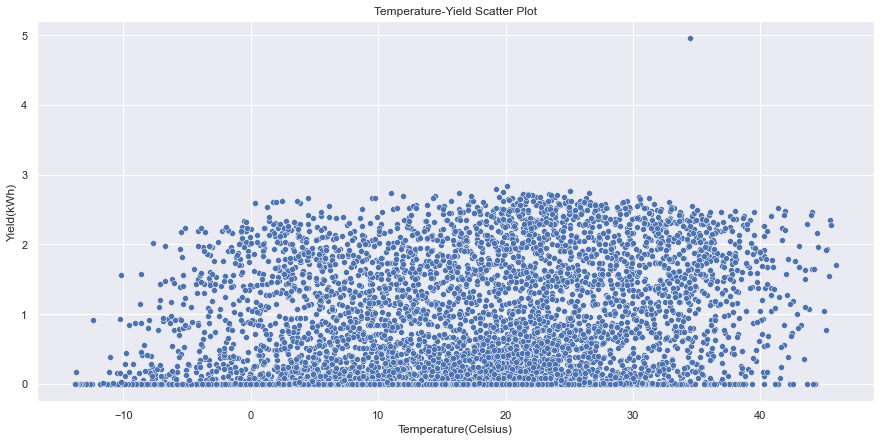

In [23]:
sns.set(rc={'figure.figsize':(15, 7)})
sns.scatterplot(x='temperature', y='yield_kWh', data=df_weather_use)
plt.title("Temperature-Yield Scatter Plot")
plt.xlabel("Temperature(Celsius)")
plt.ylabel("Yield(kWh)")
plt.show()

#### (2) Boxplot

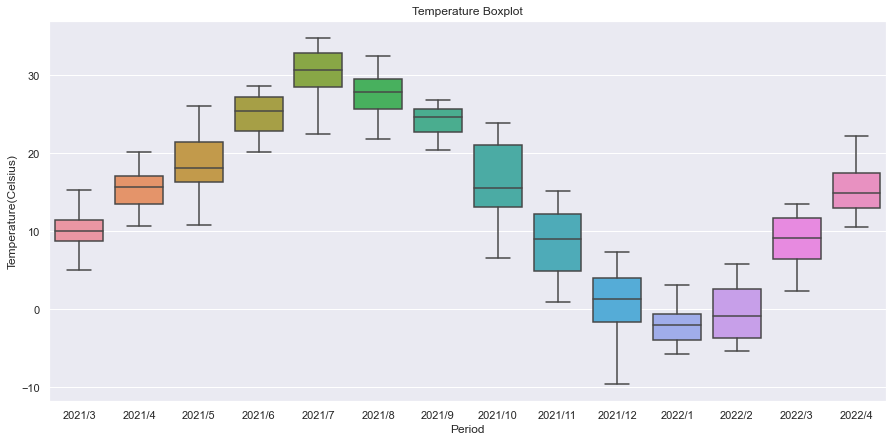

In [24]:
sns.set(rc={'figure.figsize':(15, 7)})
sns.boxplot(y='temperature', x='ym', data=df_weather_final)
plt.title("Temperature Boxplot")
plt.xlabel("Period")
plt.ylabel("Temperature(Celsius)")
plt.show()

#### (3) Basic Statistics

In [25]:
# iloc method : 2021.03 ~ 2022.04
df_weather_final.groupby(['ym']).describe()['temperature'].iloc[3:, :]

,count,mean,std,min,25%,50%,75%,max
ym,,,,,,,,
2021/3,31.0,10.133769,2.381789,4.992891,8.708385,10.016485,11.433576,15.261175
2021/4,30.0,15.466460,2.568734,10.670572,13.483818,15.700511,17.057753,20.183846
2021/5,31.0,18.861826,3.570850,10.801873,16.337334,18.135520,21.460241,26.018458
2021/6,30.0,25.133784,2.554054,20.107743,22.825967,25.456379,27.253023,28.637984
2021/7,31.0,30.496752,3.199052,22.475266,28.495174,30.694840,32.832470,34.742825
2021/8,31.0,27.535790,2.810996,21.852351,25.651594,27.869564,29.502716,32.472133
2021/9,30.0,24.156810,1.959582,20.453994,22.735360,24.655346,25.686759,26.791372
2022/1,31.0,-1.877354,2.311476,-5.702507,-3.912507,-1.974861,-0.570796,3.134847
2022/2,28.0,-0.585899,3.325288,-5.327558,-3.643950,-0.918984,2.585775,5.789713


#### **4) Variable Analysis - 'x축 풍속'**

#### (1) Scatter Plot
- 일별 데이터 변환 : 'mean'

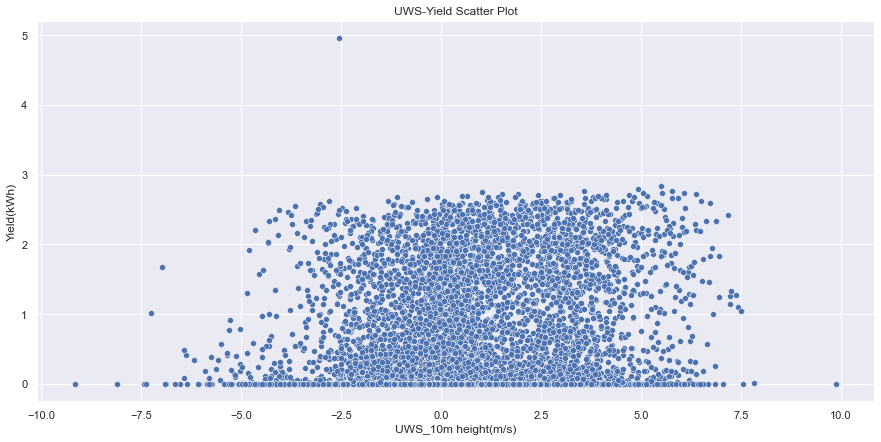

In [26]:
sns.set(rc={'figure.figsize':(15, 7)})
sns.scatterplot(x='uws_10m', y='yield_kWh', data=df_weather_use)
plt.title("UWS-Yield Scatter Plot")
plt.xlabel("UWS_10m height(m/s)")
plt.ylabel("Yield(kWh)")
plt.show()

#### (2) Boxplot

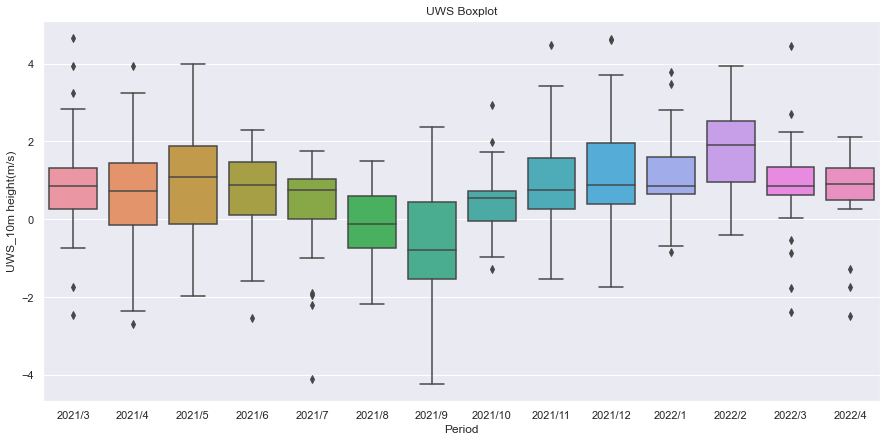

In [27]:
sns.set(rc={'figure.figsize':(15, 7)})
sns.boxplot(y='uws_10m', x='ym', data=df_weather_final)
plt.title("UWS Boxplot")
plt.xlabel("Period")
plt.ylabel("UWS_10m height(m/s)")
plt.show()

#### (3) Basic Statistics

In [28]:
# iloc method : 2021.03 ~ 2022.04
df_weather_final.groupby(['ym']).describe()['uws_10m'].iloc[3:, :]

,count,mean,std,min,25%,50%,75%,max
ym,,,,,,,,
2021/3,31.0,0.913920,1.493998,-2.472823,0.252497,0.860340,1.319617,4.654077
2021/4,30.0,0.631529,1.621552,-2.687740,-0.152444,0.718164,1.438693,3.934309
2021/5,31.0,0.868309,1.399918,-1.968245,-0.126479,1.079480,1.868564,3.993279
2021/6,30.0,0.624219,1.121305,-2.550281,0.120206,0.869399,1.459567,2.280455
2021/7,31.0,0.287189,1.311864,-4.117289,0.016592,0.760748,1.035819,1.765012
2021/8,31.0,-0.116943,0.995314,-2.175769,-0.737396,-0.126584,0.604856,1.491948
2021/9,30.0,-0.665540,1.505758,-4.234517,-1.525265,-0.789334,0.454011,2.365470
2022/1,31.0,1.132090,1.052344,-0.853850,0.641326,0.850364,1.590918,3.794980
2022/2,28.0,1.870921,1.134696,-0.418153,0.946472,1.906226,2.534091,3.946182


#### **5) Variable Analysis - 'y축 풍속'**

#### (1) Scatter Plot
- 일별 데이터 변환 : 'mean'

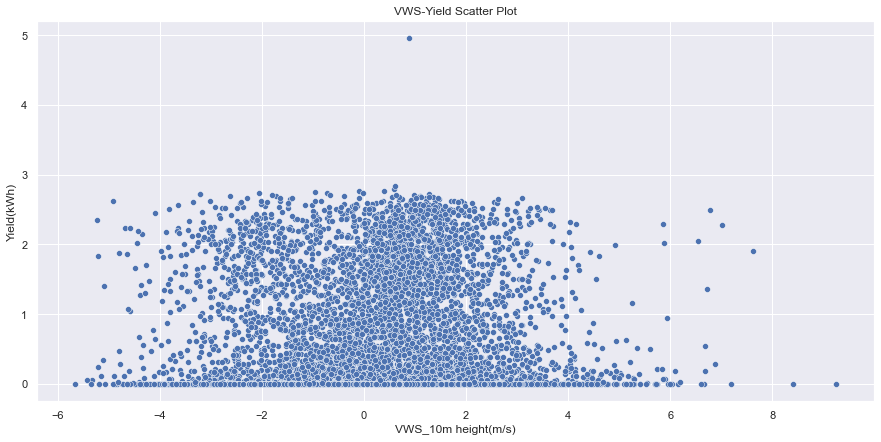

In [29]:
sns.set(rc={'figure.figsize':(15, 7)})
sns.scatterplot(x='vws_10m', y='yield_kWh', data=df_weather_use)
plt.title("VWS-Yield Scatter Plot")
plt.xlabel("VWS_10m height(m/s)")
plt.ylabel("Yield(kWh)")
plt.show()

#### (2) Boxplot

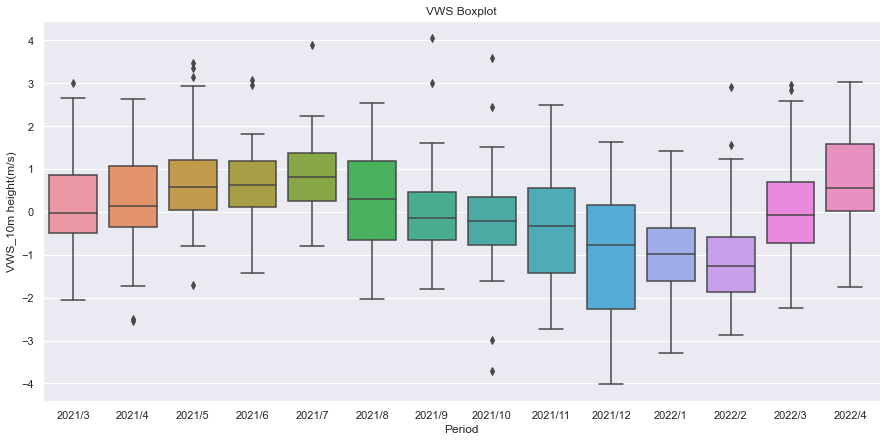

In [30]:
sns.set(rc={'figure.figsize':(15, 7)})
sns.boxplot(y='vws_10m', x='ym', data=df_weather_final)
plt.title("VWS Boxplot")
plt.xlabel("Period")
plt.ylabel("VWS_10m height(m/s)")
plt.show()

#### (3) Basic Statistics

In [31]:
# iloc method : 2021.03 ~ 2022.04
df_weather_final.groupby(['ym']).describe()['vws_10m'].iloc[3:, :]

,count,mean,std,min,25%,50%,75%,max
ym,,,,,,,,
2021/3,31.0,0.224292,1.261356,-2.043070,-0.497907,-0.029264,0.865263,3.011769
2021/4,30.0,0.262826,1.328741,-2.548221,-0.355271,0.143068,1.069920,2.624341
2021/5,31.0,0.886090,1.272130,-1.705243,0.039153,0.585101,1.201195,3.472385
2021/6,30.0,0.752111,0.948356,-1.435230,0.125768,0.622407,1.194829,3.071341
2021/7,31.0,0.776511,0.995413,-0.799028,0.263428,0.816904,1.379203,3.889194
2021/8,31.0,0.337827,1.164895,-2.020647,-0.663351,0.293437,1.180691,2.537073
2021/9,30.0,0.066283,1.267706,-1.807123,-0.654942,-0.135370,0.461660,4.052212
2022/1,31.0,-0.880259,1.098547,-3.286058,-1.618409,-0.981481,-0.385302,1.414012
2022/2,28.0,-1.026029,1.323755,-2.865841,-1.869619,-1.251067,-0.577295,2.905425


#### **6) Variable Analysis - '상대 습도'**

#### (1) Scatter Plot
- 일별 데이터 변환 : 'mean'

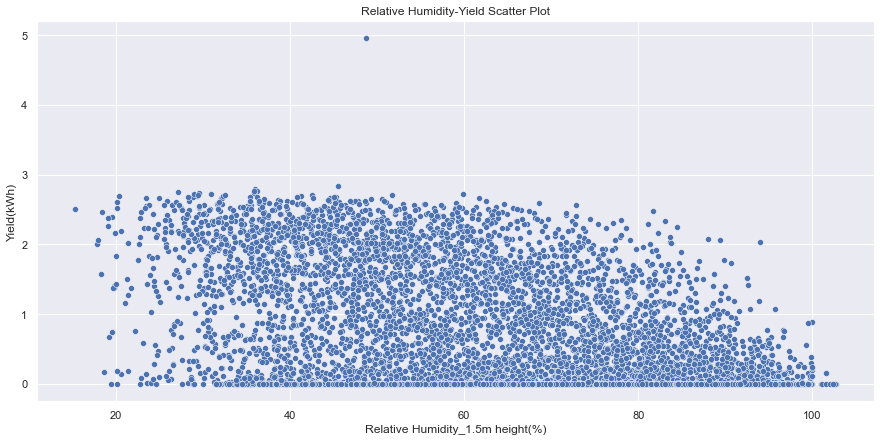

In [32]:
sns.set(rc={'figure.figsize':(15, 7)})
sns.scatterplot(x='relative_humidity_1p5m', y='yield_kWh', data=df_weather_use)
plt.title("Relative Humidity-Yield Scatter Plot")
plt.xlabel("Relative Humidity_1.5m height(%)")
plt.ylabel("Yield(kWh)")
plt.show()

#### (2) Boxplot

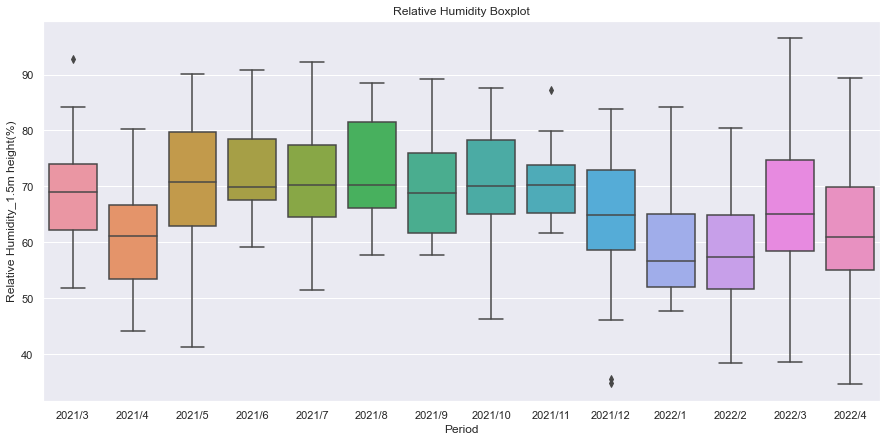

In [33]:
sns.set(rc={'figure.figsize':(15, 7)})
sns.boxplot(y='relative_humidity_1p5m', x='ym', data=df_weather_final)
plt.title("Relative Humidity Boxplot")
plt.xlabel("Period")
plt.ylabel("Relative Humidity_1.5m height(%)")
plt.show()

#### (3) Basic Statistics

In [34]:
# iloc method : 2021.03 ~ 2022.04
df_weather_final.groupby(['ym']).describe()['relative_humidity_1p5m'].iloc[3:, :]

,count,mean,std,min,25%,50%,75%,max
ym,,,,,,,,
2021/3,31.0,68.849258,9.544054,51.819636,62.238967,68.913090,74.031268,92.807657
2021/4,30.0,60.413528,9.112951,44.158033,53.342954,61.071584,66.748660,80.207256
2021/5,31.0,70.228561,11.732446,41.218393,62.953179,70.767296,79.640159,90.073594
2021/6,30.0,72.138396,7.544501,59.089913,67.479840,69.960239,78.493369,90.902795
2021/7,31.0,70.576922,9.667087,51.538592,64.455331,70.203819,77.441062,92.276040
2021/8,31.0,72.877966,9.255292,57.658718,66.094149,70.283741,81.594272,88.566809
2021/9,30.0,70.042124,8.926945,57.682598,61.652016,68.798358,75.949997,89.265995
2022/1,31.0,59.923268,9.533613,47.646761,52.008572,56.664956,65.053208,84.141849
2022/2,28.0,57.969291,11.128652,38.361353,51.553030,57.389595,64.888903,80.517883


#### **7) Variable Analysis - '절대 습도'**

#### (1) Scatter Plot
- 일별 데이터 변환 : 'mean'

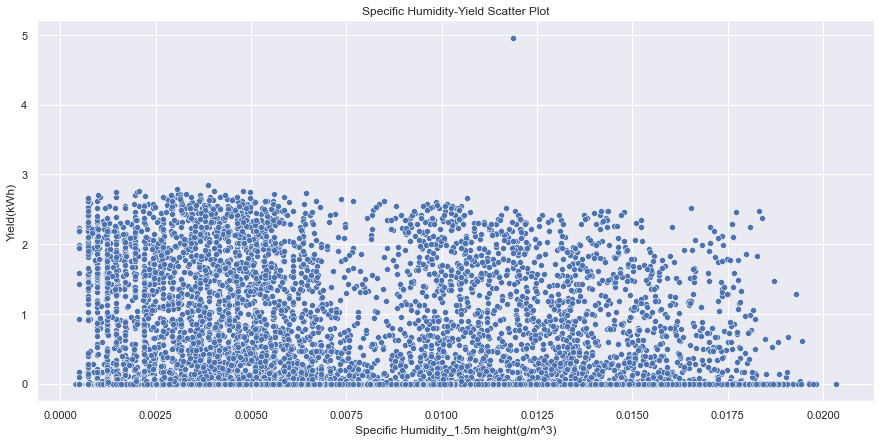

In [35]:
sns.set(rc={'figure.figsize':(15, 7)})
sns.scatterplot(x='specific_humidity_1p5m', y='yield_kWh', data=df_weather_use)
plt.title("Specific Humidity-Yield Scatter Plot")
plt.xlabel("Specific Humidity_1.5m height(g/m^3)")
plt.ylabel("Yield(kWh)")
plt.show()

#### (2) Boxplot

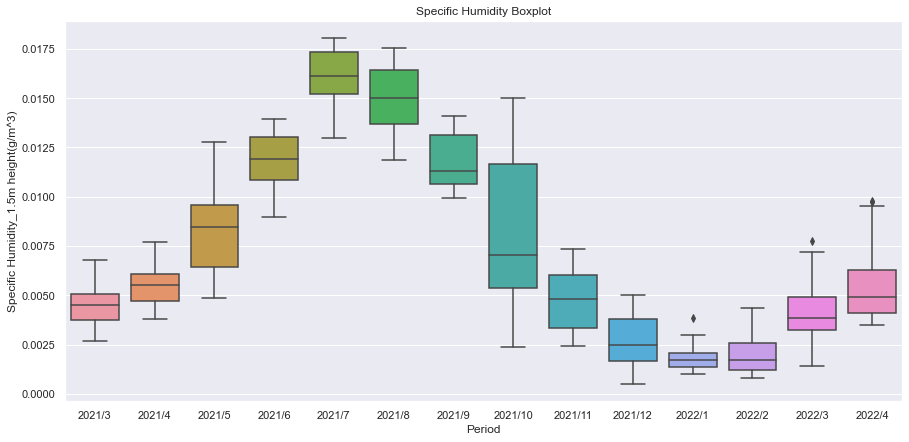

In [36]:
sns.set(rc={'figure.figsize':(15, 7)})
sns.boxplot(y='specific_humidity_1p5m', x='ym', data=df_weather_final)
plt.title("Specific Humidity Boxplot")
plt.xlabel("Period")
plt.ylabel("Specific Humidity_1.5m height(g/m^3)")
plt.show()

#### (3) Basic Statistics

In [37]:
# iloc method : 2021.03 ~ 2022.04
df_weather_final.groupby(['ym']).describe()['specific_humidity_1p5m'].iloc[3:, :]

,count,mean,std,min,25%,50%,75%,max
ym,,,,,,,,
2021/3,31.0,0.004480,0.000934,0.002665,0.003761,0.004514,0.005083,0.006788
2021/4,30.0,0.005482,0.000962,0.003779,0.004717,0.005542,0.006068,0.007709
2021/5,31.0,0.008141,0.001836,0.004860,0.006431,0.008484,0.009553,0.012750
2021/6,30.0,0.011794,0.001249,0.008964,0.010829,0.011891,0.013007,0.013935
2021/7,31.0,0.016070,0.001386,0.012951,0.015194,0.016116,0.017341,0.018040
2021/8,31.0,0.014940,0.001655,0.011877,0.013705,0.015015,0.016429,0.017533
2021/9,30.0,0.011745,0.001385,0.009949,0.010625,0.011319,0.013127,0.014087
2022/1,31.0,0.001831,0.000654,0.001020,0.001354,0.001735,0.002090,0.003874
2022/2,28.0,0.001933,0.000924,0.000815,0.001224,0.001698,0.002602,0.004341


#### **8) Variable Analysis - '강수량'**

#### (1) Scatter Plot
- 일별 데이터 변환 불가능

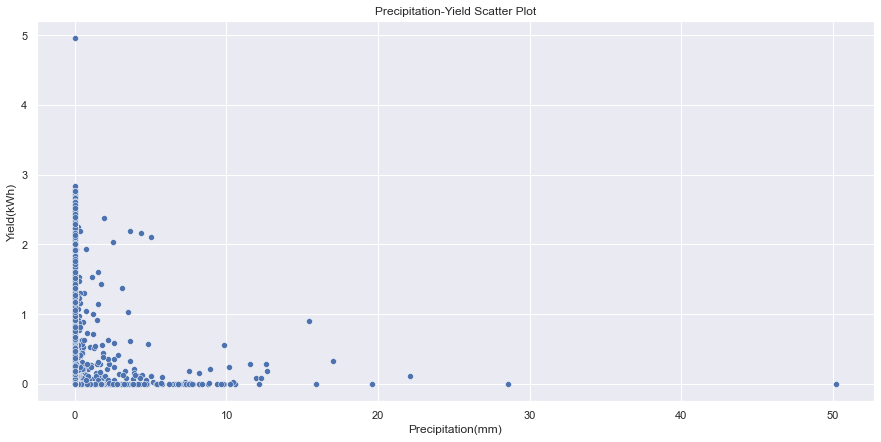

In [38]:
sns.set(rc={'figure.figsize':(15, 7)})
sns.scatterplot(x='precipitation', y='yield_kWh', data=df_weather_use)
plt.title("Precipitation-Yield Scatter Plot")
plt.xlabel("Precipitation(mm)")
plt.ylabel("Yield(kWh)")
plt.show()

#### (2) Boxplot

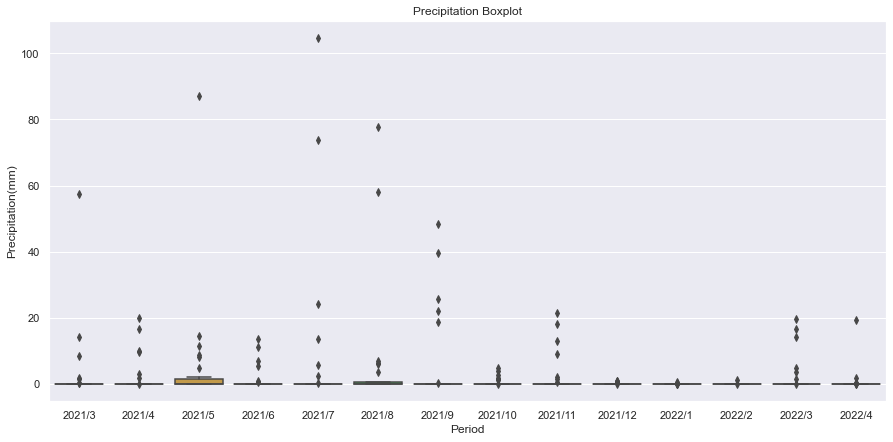

In [39]:
sns.set(rc={'figure.figsize':(15, 7)})
sns.boxplot(y='precipitation', x='ym', data=df_weather_final)
plt.title("Precipitation Boxplot")
plt.xlabel("Period")
plt.ylabel("Precipitation(mm)")
plt.show()

#### (3) Basic Statistics

In [40]:
# iloc method : 2021.03 ~ 2022.04
df_weather_final.groupby(['ym']).describe()['precipitation'].iloc[3:, :]

,count,mean,std,min,25%,50%,75%,max
ym,,,,,,,,
2021/3,31.0,2.703616,10.574063,0.0,0.0,0.0,0.032471,57.434692
2021/4,30.0,2.050573,5.127131,0.0,0.0,0.0,0.017487,19.928589
2021/5,31.0,4.557760,15.767264,0.0,0.0,0.0,1.455734,87.069275
2021/6,30.0,1.292352,3.429853,0.0,0.0,0.0,0.038727,13.623779
2021/7,31.0,7.231918,22.765516,0.0,0.0,0.0,0.023438,104.588867
2021/8,31.0,5.207716,17.041896,0.0,0.0,0.0,0.531494,77.706543
2021/9,30.0,5.155501,12.602719,0.0,0.0,0.0,0.040649,48.296631
2022/1,31.0,0.035790,0.116298,0.0,0.0,0.0,0.000000,0.595612
2022/2,28.0,0.042848,0.217424,0.0,0.0,0.0,0.000000,1.151276


<hr>

#### **<Data 2 : Visibility Data>**

#### **1) Data Pre-processing**

In [41]:
# ASOS data 폴더
asos_folder_root = os.path.join(root, 'data_ASOS')

# csv 파일 이름
csv_file_name = ['OBS_ASOS_TIM_1.csv', 'OBS_ASOS_TIM_2.csv']

# 데이터 호출
for i in range(len(csv_file_name)):
    csv_name = asos_folder_root + '\\' + csv_file_name[i]
    if i == 0:
        df_asos = pd.read_csv(csv_name, encoding='cp949')
    else:
        temp = pd.read_csv(csv_name, encoding='cp949')
        df_asos = pd.concat([df_asos, temp])

In [42]:
df_asos['일시'] = pd.to_datetime(df_asos['일시'], format='%Y/%m/%d %H:%M:%S')
df_asos['year'] = df_asos['일시'].dt.year
df_asos['month'] = df_asos['일시'].dt.month
df_asos['day'] = df_asos['일시'].dt.day
df_asos['hour'] = df_asos['일시'].dt.hour

In [43]:
df_asos.head(10)

,지점,지점명,일시,시정(10m),year,month,day,hour
0,90,속초,2021-03-01 00:00:00,2000,2021,3,1,0
1,90,속초,2021-03-01 01:00:00,2000,2021,3,1,1
2,90,속초,2021-03-01 02:00:00,2000,2021,3,1,2
3,90,속초,2021-03-01 03:00:00,1951,2021,3,1,3
4,90,속초,2021-03-01 04:00:00,1877,2021,3,1,4
5,90,속초,2021-03-01 05:00:00,1630,2021,3,1,5
6,90,속초,2021-03-01 06:00:00,713,2021,3,1,6
7,90,속초,2021-03-01 07:00:00,794,2021,3,1,7
8,90,속초,2021-03-01 08:00:00,716,2021,3,1,8
9,90,속초,2021-03-01 09:00:00,906,2021,3,1,9


In [44]:
# 지점명 체크
df_asos['지점명'].unique()

array(['속초', '북춘천', '철원', '동두천', '파주', '대관령', '춘천', '백령도', '북강릉', '강릉',
       '동해', '서울', '인천', '원주', '울릉도', '수원', '영월', '충주', '서산', '울진', '청주',
       '대전', '추풍령', '안동', '상주', '포항', '군산', '대구', '전주', '울산', '창원', '광주',
       '부산', '통영', '목포', '여수', '흑산도', '완도', '고창', '순천', '홍성', '제주', '고산',
       '성산', '서귀포', '진주', '강화', '양평', '이천', '인제', '홍천', '태백', '정선군', '제천',
       '보은', '천안', '보령', '부여', '금산', '세종', '부안', '임실', '정읍', '남원', '장수',
       '고창군', '영광군', '김해시', '순창군', '북창원', '양산시', '보성군', '강진군', '장흥', '해남',
       '고흥', '의령군', '함양군', '광양시', '진도군', '봉화', '영주', '문경', '청송군', '영덕',
       '의성', '구미', '영천', '경주시', '거창', '합천', '밀양', '산청', '거제', '남해'],
      dtype=object)

In [45]:
# '김OO' 가구 위치는 '서울'이므로 해당 지역으로 필터링
df_asos_filter = df_asos[df_asos['지점명'] == '서울']

In [46]:
# Data Merge
df_asos_filter = pd.merge(df_asos_filter, df_user_filter, how='left', on=['year', 'month', 'day', 'hour'])

In [47]:
# Column 이름 변경
df_asos_filter.rename(columns={'그리드 소비(kWh)': 'grid_kWh', '수출 된 에너지(kWh)': 'export_kWh',
                               '에너지 수율(kWh)': 'yield_kWh', '시정(10m)': 'visibility', '지점명': 'place'}, inplace=True)

In [48]:
df_asos_filter = df_asos_filter.drop(['지점', '일시'], axis = 1)

In [49]:
df_asos_filter.head(24)

,place,visibility,year,month,day,hour,grid_kWh,export_kWh,yield_kWh
0,서울,2000,2021,3,1,0,0.200001,0.000000,0.000000
1,서울,2000,2021,3,1,1,0.250000,0.000000,0.000000
2,서울,2000,2021,3,1,2,0.210003,0.000000,0.000000
3,서울,2000,2021,3,1,3,0.180000,0.000000,0.000000
4,서울,447,2021,3,1,4,0.190002,0.000000,0.000000
5,서울,1303,2021,3,1,5,0.200001,0.000000,0.000000
6,서울,587,2021,3,1,6,0.299999,0.000000,0.000000
7,서울,381,2021,3,1,7,0.270000,0.000000,0.000000
8,서울,381,2021,3,1,8,0.399998,0.000000,0.000000
9,서울,294,2021,3,1,9,0.219997,0.000000,0.050003


In [50]:
# 1시간 단위 -> 1일 단위 데이터로 변경

print('1일 단위 데이터로 변경 시작')

# 1) 결과 Dictionary 생성
visi_time = {}
visi_time['year'] = [] # 연도
visi_time['month'] = [] # 월
visi_time['day'] = [] # 일
visi_time['visibility'] = [] # 시정

# 2) 연도 필터링
u_year = df_weather_use.year.unique()

# 3) 연도 -> 월 -> 일 필터링
for y in u_year:
    day_filter1 = df_asos_filter[df_asos_filter.year == y]
    
    # 월 필터링
    u_month = day_filter1.month.unique()
    
    for m in u_month:
        day_filter2 = day_filter1[day_filter1.month == m]
        
        # 일 필터링
        u_day = day_filter2.day.unique()
        
        for d in u_day:
            day_filter3 = day_filter2[day_filter2.day == d]
            
            # 4) 시정 변수 평균 구하기
            vis = np.mean(day_filter3.visibility)
            
            # 5) 결과 Dictionary에 값 대입
            visi_time['year'].append(y)
            visi_time['month'].append(m)
            visi_time['day'].append(d)
            visi_time['visibility'].append(vis)
    
visi_time_final = pd.DataFrame(visi_time)
print('1일 단위 데이터로 변경 완료')

1일 단위 데이터로 변경 시작
1일 단위 데이터로 변경 완료


In [51]:
visi_time_final.loc[:, 'ym'] = visi_time_final.year.astype(str) + '/' + visi_time_final.month.astype(str)

In [52]:
visi_time_final.head(10)

,year,month,day,visibility,ym
0,2021,3,1,769.291667,2021/3
1,2021,3,2,1935.666667,2021/3
2,2021,3,3,1972.000000,2021/3
3,2021,3,4,1946.875000,2021/3
4,2021,3,5,1768.750000,2021/3
5,2021,3,6,1646.291667,2021/3
6,2021,3,7,1987.916667,2021/3
7,2021,3,8,1886.250000,2021/3
8,2021,3,9,1902.083333,2021/3
9,2021,3,10,820.500000,2021/3


#### **2) Variable Analysis - '시정'**

#### (1) Scatter Plot
- 일별 데이터 변환 : 'mean'

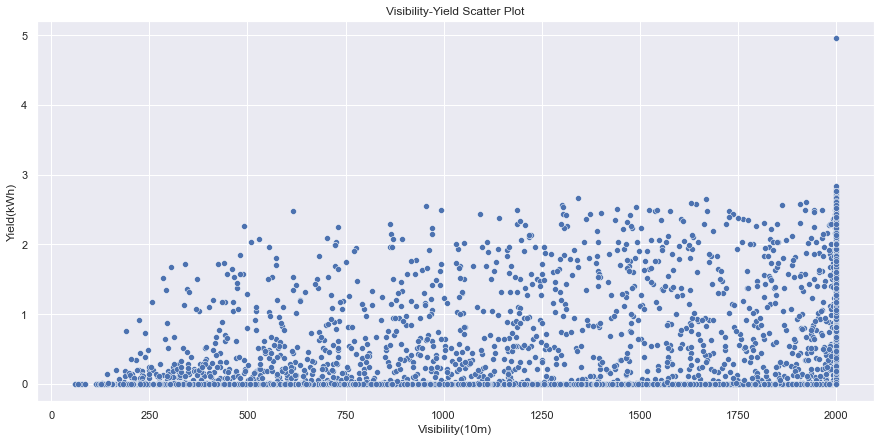

In [53]:
sns.set(rc={'figure.figsize':(15, 7)})
sns.scatterplot(x='visibility', y='yield_kWh', data=df_asos_filter)
plt.title("Visibility-Yield Scatter Plot")
plt.xlabel("Visibility(10m)")
plt.ylabel("Yield(kWh)")
plt.show()

#### (2) Boxplot

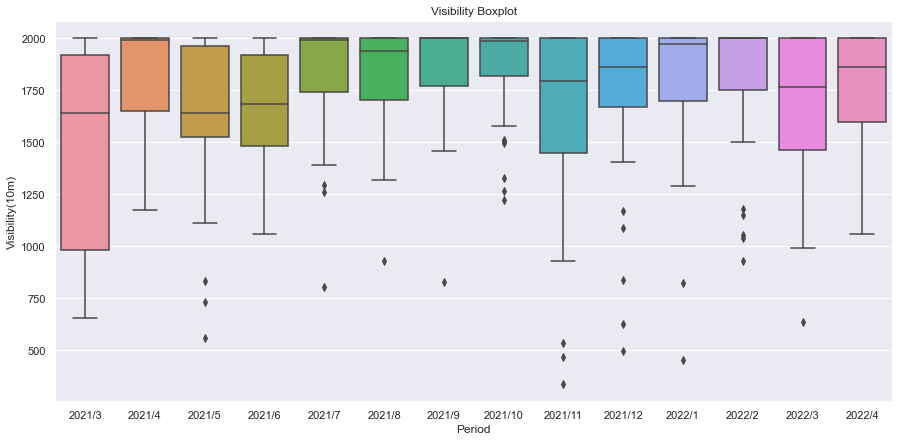

In [54]:
sns.set(rc={'figure.figsize':(15, 7)})
sns.boxplot(y='visibility', x='ym', data=visi_time_final)
plt.title("Visibility Boxplot")
plt.xlabel("Period")
plt.ylabel("Visibility(10m)")
plt.show()

#### (3) Basic Statistics

In [55]:
# iloc method : 2021.03 ~ 2022.04
visi_time_final.groupby(['ym']).describe()['visibility'].iloc[3:, :]

,count,mean,std,min,25%,50%,75%,max
ym,,,,,,,,
2021/3,31.0,1477.162634,484.522340,656.875000,979.083333,1637.625000,1918.875000,2000.0
2021/4,30.0,1815.469444,254.997942,1174.583333,1648.031250,1990.187500,2000.000000,2000.0
2021/5,31.0,1620.830645,400.871323,556.583333,1524.166667,1638.500000,1961.270833,2000.0
2021/6,30.0,1655.452778,280.882246,1056.500000,1482.437500,1684.416667,1917.593750,2000.0
2021/7,31.0,1816.673387,297.988846,803.083333,1742.500000,1991.666667,2000.000000,2000.0
2021/8,31.0,1825.365591,257.110591,926.250000,1702.125000,1938.375000,2000.000000,2000.0
2021/9,30.0,1860.731944,252.326563,826.333333,1768.989583,2000.000000,2000.000000,2000.0
2022/1,31.0,1759.418011,374.220072,451.666667,1696.229167,1970.500000,2000.000000,2000.0
2022/2,28.0,1782.857143,358.914222,926.208333,1749.583333,1998.916667,2000.000000,2000.0


<hr>

### **2. Regression Analysis**

#### **1) Creating Data & Pre-processing**

In [56]:
# 회귀분석 진행을 위한 데이터 생성
reg_data = pd.merge(df_weather_use, df_asos_filter, how='left', on=['year', 'month', 'day', 'hour', 'grid_kWh', 'export_kWh', 'yield_kWh'])

In [57]:
reg_data = reg_data.drop(['owner', 'id_hh', 'id_hs'], axis = 1)

In [58]:
reg_data.head(10)

,dt,temperature,uws_10m,vws_10m,ghi,precipitation,relative_humidity_1p5m,specific_humidity_1p5m,year,month,day,hour,grid_kWh,export_kWh,yield_kWh,place,visibility
0,2021-03-01 00:00:00+09:00,10.322687,0.858208,0.041718,0.000000,0.000000,60.644928,0.004421,2021,3,1,0,0.200001,0.0,0.000000,서울,2000
1,2021-03-01 01:00:00+09:00,10.029108,0.135828,-1.085083,0.000000,0.000000,56.432068,0.004188,2021,3,1,1,0.250000,0.0,0.000000,서울,2000
2,2021-03-01 02:00:00+09:00,9.844873,0.362611,-0.180941,0.000000,0.000000,62.081512,0.004626,2021,3,1,2,0.210003,0.0,0.000000,서울,2000
3,2021-03-01 03:00:00+09:00,9.587915,-0.411156,0.997797,0.000000,0.000000,56.335152,0.004261,2021,3,1,3,0.180000,0.0,0.000000,서울,2000
4,2021-03-01 04:00:00+09:00,9.564752,-0.462263,-0.222837,0.000000,0.000000,61.451012,0.004599,2021,3,1,4,0.190002,0.0,0.000000,서울,447
5,2021-03-01 05:00:00+09:00,9.363092,0.721948,-2.010242,0.000000,0.000000,64.313083,0.004559,2021,3,1,5,0.200001,0.0,0.000000,서울,1303
6,2021-03-01 06:00:00+09:00,8.639551,-1.163785,-1.346743,0.000000,2.439514,92.884331,0.005859,2021,3,1,6,0.299999,0.0,0.000000,서울,587
7,2021-03-01 07:00:00+09:00,8.481317,-0.673493,-1.971651,0.000000,1.226685,94.962051,0.006039,2021,3,1,7,0.270000,0.0,0.000000,서울,381
8,2021-03-01 08:00:00+09:00,8.494592,-1.207814,-0.468723,3.883789,1.170898,93.874001,0.005951,2021,3,1,8,0.399998,0.0,0.000000,서울,381
9,2021-03-01 09:00:00+09:00,8.613031,-5.542665,1.533955,18.028790,0.239624,88.038452,0.005981,2021,3,1,9,0.219997,0.0,0.050003,서울,294


#### **2) Checking the correlation between variables**

In [59]:
# 시각화를 위한 필요한 변수만 남기고, 나머지 변수는 제거하기

# 제거한 변수 #
# dt : 날짜
# year : 연도
# month : 월
# day : 일
# hour : 시간
# place : 시정 측정한 위치
# precipitation : 강수량
# grid_kWh : 그리드 소비(kWh)
# export_kWh : 수출 된 에너지(kWh)
# yield_kWh : 에너지 수율(kWh)

reg_data_vis = reg_data.drop(['dt', 'year', 'month', 'day', 'hour', 'place', 'precipitation', 'grid_kWh', 'export_kWh', 'yield_kWh'], axis=1)

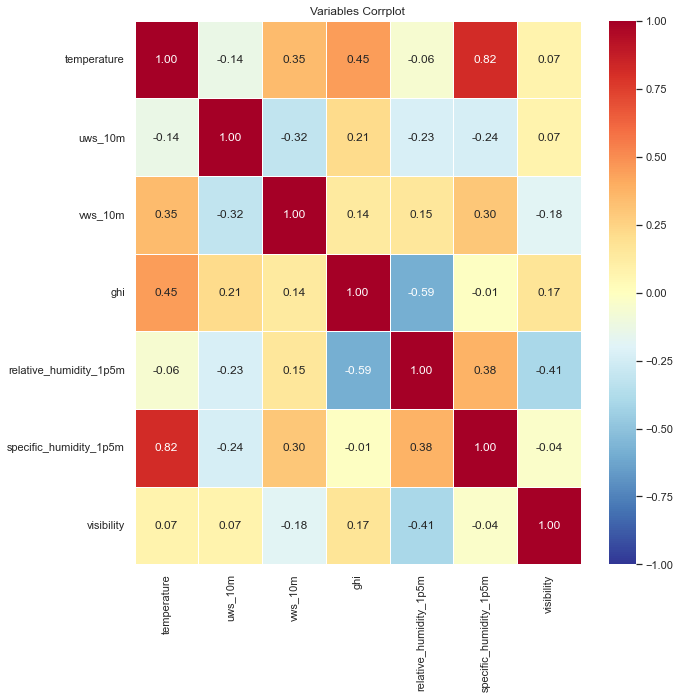

In [60]:
# Heatmap Options
# annot=True : 실제 값 표시하기
# linewidths : 경계면 실선으로 구분하기
# cmap : 컬러 설정하기
# vmin, vmax : 컬러바 범위 설정하기
plt.figure(figsize=(10,10))
sns.heatmap(data=reg_data_vis.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='RdYlBu_r', vmin=-1, vmax=1)
plt.title("Variables Corrplot")
plt.show()

In [61]:
# temperature(기온), specific_humidity_1p5m(절대습도)의 Correlation = 0.82이므로 상당히 높음.
# 습도는 'relative_humidity_1p5m(상대습도)'와 'specific_humidity_1p5m(절대습도)'가 존재하므로, '절대습도'를 제거함.
reg_data_vis = reg_data_vis.drop(['specific_humidity_1p5m'], axis=1)

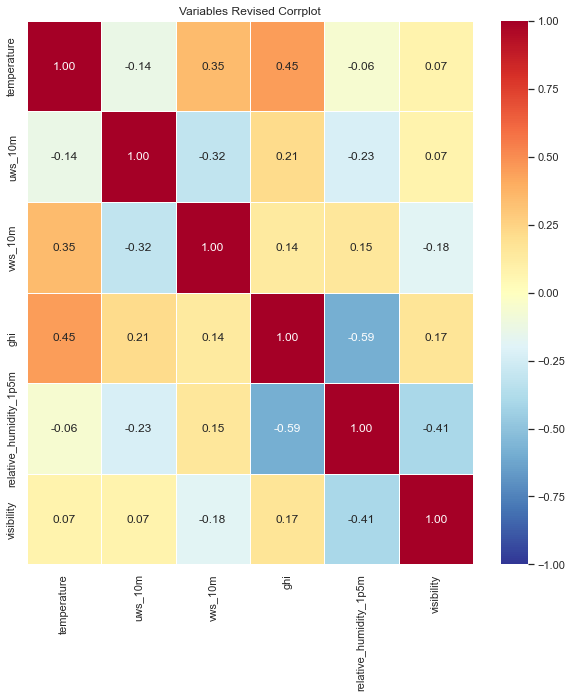

In [62]:
plt.figure(figsize=(10,10))
sns.heatmap(data=reg_data_vis.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='RdYlBu_r', vmin=-1, vmax=1)
plt.title("Variables Revised Corrplot")
plt.show()

<hr>

#### **Case 1 : 그리드 변수(kWh)**

#### Package 1 : Scikit-learn

#### (1) Training & Test Set Split from data other than NA

In [72]:
x = reg_data.dropna(axis=0)[['temperature', 'uws_10m', 'vws_10m', 'ghi', 'relative_humidity_1p5m', 'visibility']]
y = reg_data.dropna(axis=0)[['grid_kWh']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

#### (2) Modeling

In [73]:
# Initialization
lin_reg = linear_model.LinearRegression(fit_intercept=True)

In [74]:
# Fitting
lin_reg_model = lin_reg.fit(x_train, y_train)

In [75]:
# Predicting(Estimated values)
y_predict = lin_reg_model.predict(x_test)
print(y_predict)

[[0.4051187 ]
 [0.41981364]
 [0.4412967 ]
 ...
 [0.35699784]
 [0.25534231]
 [0.10012643]]


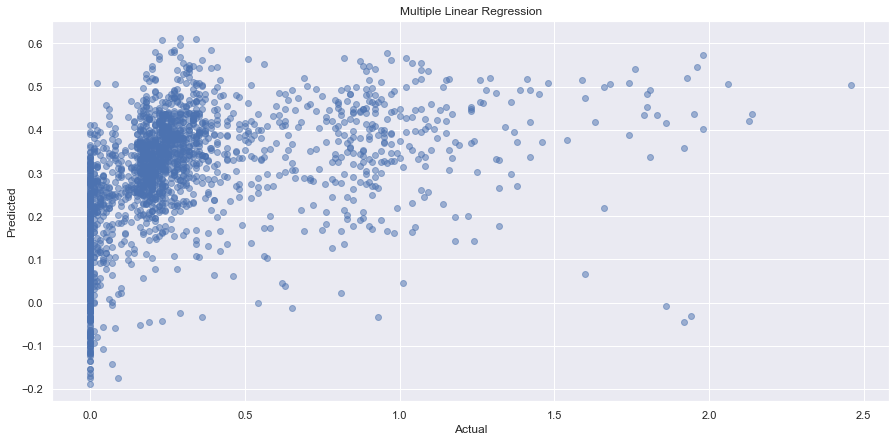

In [76]:
# Visualization confirmation
plt.scatter(y_test, y_predict, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Multiple Linear Regression')
plt.show()

#### (3) Checking coefficients and constants

In [77]:
print(lin_reg_model.coef_)

[[ 4.60050899e-03  1.90059943e-02 -9.47663493e-03 -8.78168075e-04
  -4.75362875e-03  9.62220607e-06]]


#### (4) Accuracy Test

In [78]:
# R-Squared
print(lin_reg_model.score(x_train, y_train))

0.18578460915010864


#### Package 2 : Statsmodels

#### (1) Checking fitting results
- F-statistic : 도출된 회귀식이 회귀분석 모델 전체에 대해 통계적으로 의미가 있는지 파악
- P-value : 각 변수가 종속변수에 미치는 영향이 유의한지 파악
- Adjusted R-square : 회귀직선이 종속변수의 몇 %를 설명할 수 있는지 확인

In [79]:
x_train_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train_const)
results = model.fit()

In [80]:
# 결과값 요약 확인
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               grid_kWh   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     309.6
Date:                Thu, 28 Jul 2022   Prob (F-statistic):               0.00
Time:                        20:16:44   Log-Likelihood:                -1808.9
No. Observations:                8147   AIC:                             3632.
Df Residuals:                    8140   BIC:                             3681.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.6457      0.027     24.231      0.000       0.593       0.698
temperature                0.0046      0.000     12.879      0.000       0.004       0.005
uws_10m                    0.0190      0.002     10.336      0.000       0.015       0.023
vws_10m                   -0.0095      0.002     -4.356      0.000      -0.014      -0.005
ghi                       -0.0009   2.25e-05    -39.032      0.000      -0.001      -0.001
relative_humidity_1p5m    -0.0048      0.000    -17.656      0.000      -0.005      -0.004
visibility              9.622e-06   7.37e-06      1.306      0.191   -4.82e-06    2.41e-05
==============================================================================
Omnibus:                     3922.284   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22222.919
Skew:                           2.305   Prob(JB):                         0.00
Kurtosis:                       9.649   Cond. No.                     1.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### **결과 해석**
**1. F-statistic**
- F-statistic의 P-value는 Prob(F-statistic)으로 표현된다.
- F-statistic의 P-value = 0.00으로, 0.05보다 작기에 이 회귀식은 회귀분석 모델 전체에 대해 통계적으로 의미가 있다고 볼 수 있다.

**2. Coefficients and P-value of variables**
- 전반적으로 유의미하다고 판단된다(P-value <= 0.05 기준 적용).
- visibility의 P-value = 0.191로, 0.05보다 크기에 유의미하다고 판단할 수 없다.

**3. Adjusted R-Squared**
- Adjusted R-Squared = 0.185로, 18.5%만큼의 설명력을 가진다고 할 수 있다.

**4. Notes**
> [2] The condition number is large, 1.44e+04. This might indicate that there are strong multicollinearity or other numerical problems.
- 위 문구를 통해, Numerical Problems가 존재한다는 사실을 확인할 수 있다.

In [81]:
# VIF(분산 팽창 인수)
for i in range(1, len(model.exog_names)):
    vif = variance_inflation_factor(model.exog, i)
    print(f'Variable: {model.exog_names[i]}, VIF: {vif.round(2)}')

Variable: temperature, VIF: 1.53
Variable: uws_10m, VIF: 1.23
Variable: vws_10m, VIF: 1.33
Variable: ghi, VIF: 2.25
Variable: relative_humidity_1p5m, VIF: 1.99
Variable: visibility, VIF: 1.25


#### **결과 해석**
**Variance Inflation Factor(VIF)**
- Intercept을 제외한 나머지 변수들에 각각 변수명과 VIF를 출력하였다.
- ghi(일사량) 변수의 VIF가 2.25로 가장 높은 것을 확인할 수 있다.
- 하지만, 매우 큰 값을 가지진 않으므로, 크게 문제되진 않을 수준의 Multicollinearity(다중공선성)으로 보여진다.
- 앞서 Notes [2]에 언급된 것을 고려했을 때, 데이터 수치의 문제임을 확인할 수 있다.

#### (2) Checking residuals
- 회귀모형에 대한 가정(정규성, 등분산성, 독립성)을 충족하는지에 대한 검정
- 이상치가 개입하는지에 대한 검정을 하는 절차

##### (2-1) Linearity of the model
- 예측값(y_predict)과 잔차(residuals)의 비교
- 모든 예측값에서 잔차가 비슷하게 있어야 함(가운데 점선).
- 빨간 실선은 잔차의 추세를 나타냄.
- 빨간 실선이 점선을 크게 벗어난다면 예측값에 따라 잔차가 크게 달라진다는 것임.

C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


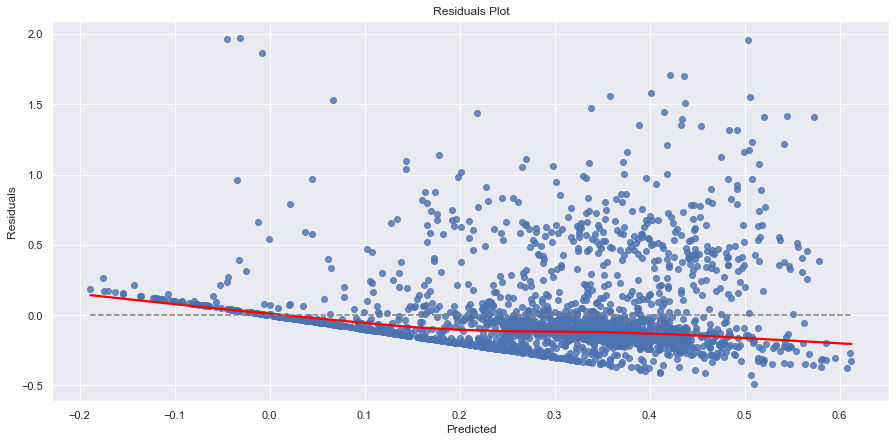

In [82]:
residuals = y_test - y_predict

sns.regplot(y_predict, residuals, lowess=True, line_kws={'color': 'red'})
plt.plot([y_predict.min(), y_predict.max()], [0, 0], '--', color='grey')
plt.title("Residuals Plot")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

##### (2-2) Normality of residuals
- 잔차가 정규분포를 따른다는 가정
- Shapiro Test를 통해 확인할 수 있음.

In [83]:
scipy.stats.shapiro(residuals)

ShapiroResult(statistic=0.7612382769584656, pvalue=0.0)

##### (2-3) Equivariance of residuals
- 회귀모형을 통해 예측된 값이 크던 작던, 모든 값을에 대하여 잔차의 분산이 동일하다는 가정
- 아래 그래프는 예측값(가로축)에 따라 잔차가 어떻게 달라지는지 보여줌.
- 빨간색 실선이 수평선을 그리는 것이 이상적임.

C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


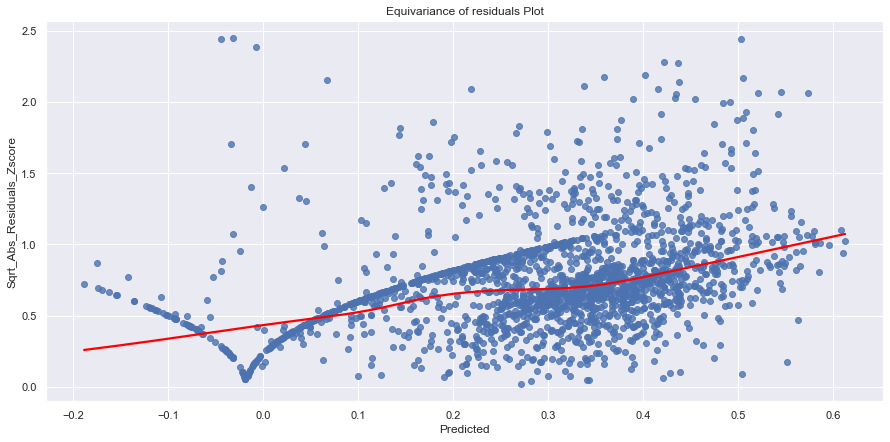

In [84]:
sr = scipy.stats.zscore(residuals)
sns.regplot(y_predict, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})
plt.title("Equivariance of residuals Plot")
plt.xlabel("Predicted")
plt.ylabel("Sqrt_Abs_Residuals_Zscore")
plt.show()

<hr>

#### **Case 2 : 수출 된 에너지(kWh)**

#### Package 1 : Scikit-learn

#### (1) Training & Test Set Split from data other than NA

In [85]:
x = reg_data.dropna(axis=0)[['temperature', 'uws_10m', 'vws_10m', 'ghi', 'relative_humidity_1p5m', 'visibility']]
y = reg_data.dropna(axis=0)[['export_kWh']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

#### (2) Modeling

In [86]:
# Initialization
lin_reg = linear_model.LinearRegression(fit_intercept=True)

In [87]:
# Fitting
lin_reg_model = lin_reg.fit(x_train, y_train)

In [88]:
# Predicting(Estimated values)
y_predict = lin_reg_model.predict(x_test)
print(y_predict)

[[ 0.31494291]
 [ 1.0008405 ]
 [ 0.34923845]
 ...
 [-0.09062776]
 [-0.10499038]
 [ 1.69373185]]


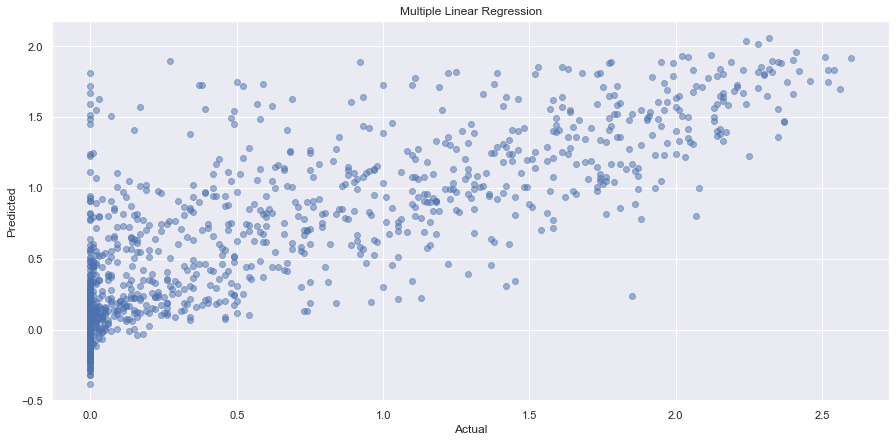

In [89]:
# Visualization confirmation
plt.scatter(y_test, y_predict, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Multiple Linear Regression')
plt.show()

#### (3) Checking coefficients and constants

In [90]:
print(lin_reg_model.coef_)

[[-9.35967202e-03 -2.61909348e-02 -8.16272804e-03  2.84179839e-03
   5.03121684e-03  5.37330567e-05]]


#### (4) Accuracy Test

In [91]:
# R-Squared
print(lin_reg_model.score(x_train, y_train))

0.7365135078457368


#### Package 2 : Statsmodels

#### (1) Checking fitting results
- F-statistic : 도출된 회귀식이 회귀분석 모델 전체에 대해 통계적으로 의미가 있는지 파악
- P-value : 각 변수가 종속변수에 미치는 영향이 유의한지 파악
- Adjusted R-square : 회귀직선이 종속변수의 몇 %를 설명할 수 있는지 확인

In [92]:
x_train_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train_const)
results = model.fit()

In [93]:
# 결과값 요약 확인
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             export_kWh   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     3792.
Date:                Thu, 28 Jul 2022   Prob (F-statistic):               0.00
Time:                        20:17:39   Log-Likelihood:                -2245.5
No. Observations:                8147   AIC:                             4505.
Df Residuals:                    8140   BIC:                             4554.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.3632      0.028    -12.797      0.000      -0.419      -0.308
temperature               -0.0094      0.000    -25.000      0.000      -0.010      -0.009
uws_10m                   -0.0262      0.002    -13.467      0.000      -0.030      -0.022
vws_10m                   -0.0082      0.002     -3.568      0.000      -0.013      -0.004
ghi                        0.0028   2.39e-05    119.106      0.000       0.003       0.003
relative_humidity_1p5m     0.0050      0.000     17.626      0.000       0.004       0.006
visibility              5.373e-05   7.85e-06      6.847      0.000    3.83e-05    6.91e-05
==============================================================================
Omnibus:                     1009.739   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9395.945
Skew:                          -0.242   Prob(JB):                         0.00
Kurtosis:                       8.239   Cond. No.                     1.46e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### **결과 해석**
**1. F-statistic**
- F-statistic의 P-value는 Prob(F-statistic)으로 표현된다.
- F-statistic의 P-value = 0.00으로, 0.05보다 작기에 이 회귀식은 회귀분석 모델 전체에 대해 통계적으로 의미가 있다고 볼 수 있다.

**2. Coefficients and P-value of variables**
- 전반적으로 유의미하다고 판단된다(P-value <= 0.05 기준 적용).

**3. Adjusted R-Squared**
- Adjusted R-Squared = 0.736으로, 73.6%만큼의 설명력을 가진다고 할 수 있다.

**4. Notes**
> [2] The condition number is large, 1.46e+04. This might indicate that there are strong multicollinearity or other numerical problems.
- 위 문구를 통해, Numerical Problems가 존재한다는 사실을 확인할 수 있다.

In [94]:
# VIF(분산 팽창 인수)
for i in range(1, len(model.exog_names)):
    vif = variance_inflation_factor(model.exog, i)
    print(f'Variable: {model.exog_names[i]}, VIF: {vif.round(2)}')

Variable: temperature, VIF: 1.53
Variable: uws_10m, VIF: 1.23
Variable: vws_10m, VIF: 1.34
Variable: ghi, VIF: 2.25
Variable: relative_humidity_1p5m, VIF: 2.01
Variable: visibility, VIF: 1.26


#### **결과 해석**
**Variance Inflation Factor(VIF)**
- Intercept을 제외한 나머지 변수들에 각각 변수명과 VIF를 출력하였다.
- ghi(일사량) 변수의 VIF가 2.25로 가장 높은 것을 확인할 수 있다.
- 하지만, 매우 큰 값을 가지진 않으므로, 크게 문제되진 않을 수준의 Multicollinearity(다중공선성)으로 보여진다.
- 앞서 Notes [2]에 언급된 것을 고려했을 때, 데이터 수치의 문제임을 확인할 수 있다.

#### (2) Checking residuals
- 회귀모형에 대한 가정(정규성, 등분산성, 독립성)을 충족하는지에 대한 검정
- 이상치가 개입하는지에 대한 검정을 하는 절차

##### (2-1) Linearity of the model
- 예측값(y_predict)과 잔차(residuals)의 비교
- 모든 예측값에서 잔차가 비슷하게 있어야 함(가운데 점선).
- 빨간 실선은 잔차의 추세를 나타냄.
- 빨간 실선이 점선을 크게 벗어난다면 예측값에 따라 잔차가 크게 달라진다는 것임.

C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


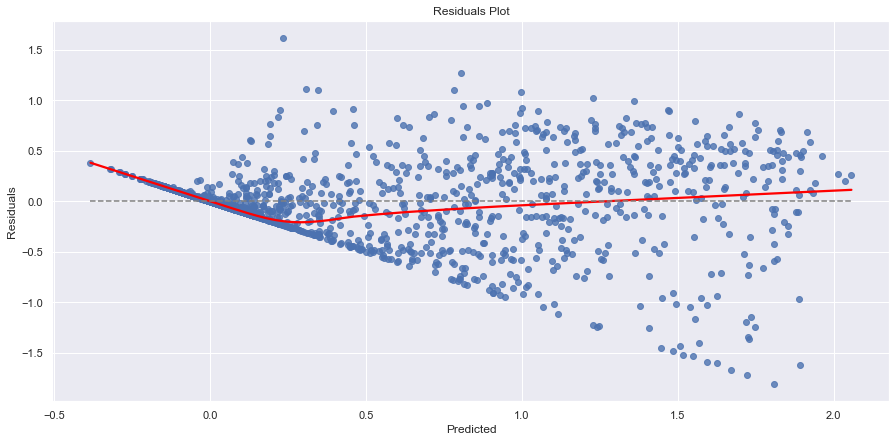

In [95]:
residuals = y_test - y_predict

sns.regplot(y_predict, residuals, lowess=True, line_kws={'color': 'red'})
plt.plot([y_predict.min(), y_predict.max()], [0, 0], '--', color='grey')
plt.title("Residuals Plot")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

##### (2-2) Normality of residuals
- 잔차가 정규분포를 따른다는 가정
- Shapiro Test를 통해 확인할 수 있음.

In [96]:
scipy.stats.shapiro(residuals)

ShapiroResult(statistic=0.891333281993866, pvalue=1.1454490050710546e-35)

##### (2-3) Equivariance of residuals
- 회귀모형을 통해 예측된 값이 크던 작던, 모든 값을에 대하여 잔차의 분산이 동일하다는 가정
- 아래 그래프는 예측값(가로축)에 따라 잔차가 어떻게 달라지는지 보여줌.
- 빨간색 실선이 수평선을 그리는 것이 이상적임.

C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


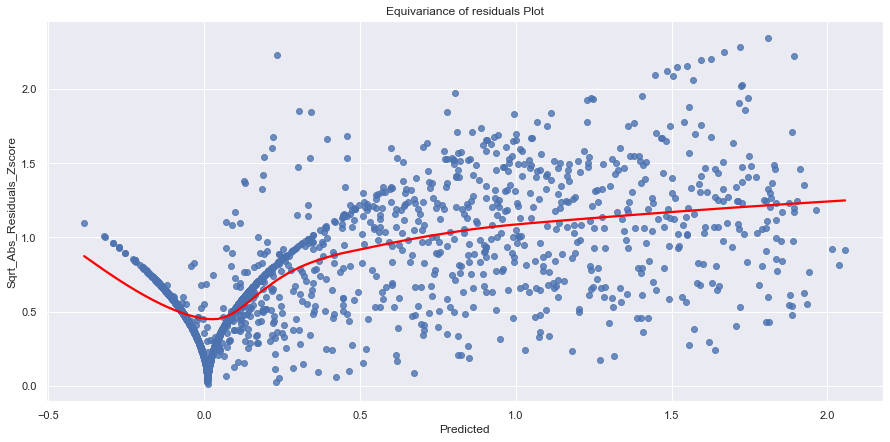

In [97]:
sr = scipy.stats.zscore(residuals)
sns.regplot(y_predict, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})
plt.title("Equivariance of residuals Plot")
plt.xlabel("Predicted")
plt.ylabel("Sqrt_Abs_Residuals_Zscore")
plt.show()

<hr>

#### **Case 3 : 에너지 수율(kWh)**

#### Package 1 : Scikit-learn

#### (1) Training & Test Set Split from data other than NA

In [107]:
x = reg_data.dropna(axis=0)[['temperature', 'uws_10m', 'vws_10m', 'ghi', 'relative_humidity_1p5m', 'visibility']]
y = reg_data.dropna(axis=0)[['yield_kWh']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

#### (2) Modeling

In [108]:
# Initialization
lin_reg = linear_model.LinearRegression(fit_intercept=True)

In [109]:
# Fitting
lin_reg_model = lin_reg.fit(x_train, y_train)

In [110]:
# Predicting(Estimated values)
y_predict = lin_reg_model.predict(x_test)
print(y_predict)

[[2.25937105]
 [0.79819989]
 [0.10491315]
 ...
 [2.2710587 ]
 [0.39857723]
 [0.91858255]]


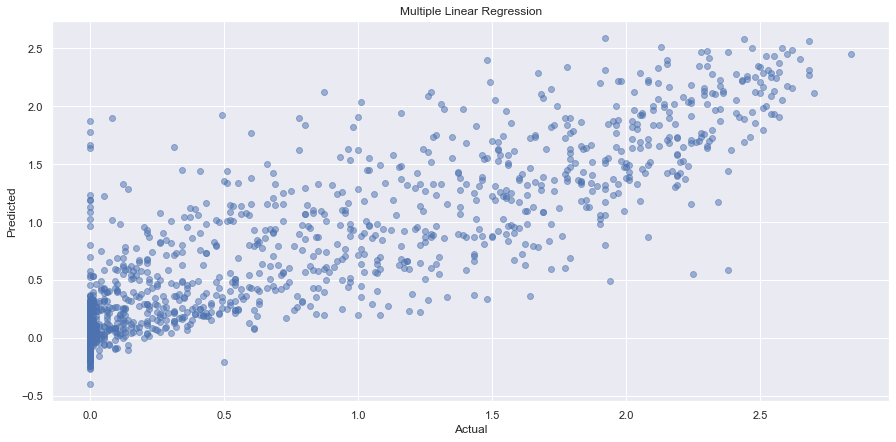

In [111]:
# Visualization confirmation
plt.scatter(y_test, y_predict, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Multiple Linear Regression')
plt.show()

#### (3) Checking coefficients and constants

In [112]:
print(lin_reg_model.coef_)

[[-1.05577565e-02 -3.01924855e-02 -1.27775960e-02  3.51600888e-03
   5.47866016e-03  6.74383380e-05]]


#### (4) Accuracy Test

In [113]:
# R-Squared
print(lin_reg_model.score(x_train, y_train))

0.8021846584072851


#### Package 2 : Statsmodels

#### (1) Checking fitting results
- F-statistic : 도출된 회귀식이 회귀분석 모델 전체에 대해 통계적으로 의미가 있는지 파악
- P-value : 각 변수가 종속변수에 미치는 영향이 유의한지 파악
- Adjusted R-square : 회귀직선이 종속변수의 몇 %를 설명할 수 있는지 확인

In [114]:
x_train_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train_const)
results = model.fit()

In [115]:
# 결과값 요약 확인
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              yield_kWh   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     5502.
Date:                Thu, 28 Jul 2022   Prob (F-statistic):               0.00
Time:                        20:18:40   Log-Likelihood:                -2680.7
No. Observations:                8147   AIC:                             5375.
Df Residuals:                    8140   BIC:                             5424.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.3622      0.030    -12.071      0.000      -0.421      -0.303
temperature               -0.0106      0.000    -26.643      0.000      -0.011      -0.010
uws_10m                   -0.0302      0.002    -14.697      0.000      -0.034      -0.026
vws_10m                   -0.0128      0.002     -5.276      0.000      -0.018      -0.008
ghi                        0.0035   2.49e-05    141.111      0.000       0.003       0.004
relative_humidity_1p5m     0.0055      0.000     18.187      0.000       0.005       0.006
visibility              6.744e-05   8.29e-06      8.140      0.000    5.12e-05    8.37e-05
==============================================================================
Omnibus:                     1170.087   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15284.439
Skew:                          -0.209   Prob(JB):                         0.00
Kurtosis:                       9.697   Cond. No.                     1.46e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### **결과 해석**
**1. F-statistic**
- F-statistic의 P-value는 Prob(F-statistic)으로 표현된다.
- F-statistic의 P-value = 0.00으로, 0.05보다 작기에 이 회귀식은 회귀분석 모델 전체에 대해 통계적으로 의미가 있다고 볼 수 있다.

**2. Coefficients and P-value of variables**
- 전반적으로 유의미하다고 판단된다(P-value <= 0.05 기준 적용).

**3. Adjusted R-Squared**
- Adjusted R-Squared = 0.802로, 80.2%만큼의 설명력을 가진다고 할 수 있다.

**4. Notes**
> [2] The condition number is large, 1.46e+04. This might indicate that there are strong multicollinearity or other numerical problems.
- 위 문구를 통해, Numerical Problems가 존재한다는 사실을 확인할 수 있다.

In [116]:
# VIF(분산 팽창 인수)
for i in range(1, len(model.exog_names)):
    vif = variance_inflation_factor(model.exog, i)
    print(f'Variable: {model.exog_names[i]}, VIF: {vif.round(2)}')

Variable: temperature, VIF: 1.54
Variable: uws_10m, VIF: 1.24
Variable: vws_10m, VIF: 1.34
Variable: ghi, VIF: 2.25
Variable: relative_humidity_1p5m, VIF: 2.01
Variable: visibility, VIF: 1.26


#### **결과 해석**
**Variance Inflation Factor(VIF)**
- Intercept을 제외한 나머지 변수들에 각각 변수명과 VIF를 출력하였다.
- ghi(일사량) 변수의 VIF가 2.25로 가장 높은 것을 확인할 수 있다.
- 하지만, 매우 큰 값을 가지진 않으므로, 크게 문제되진 않을 수준의 Multicollinearity(다중공선성)으로 보여진다.
- 앞서 Notes [2]에 언급된 것을 고려했을 때, 데이터 수치의 문제임을 확인할 수 있다.

#### (2) Checking residuals
- 회귀모형에 대한 가정(정규성, 등분산성, 독립성)을 충족하는지에 대한 검정
- 이상치가 개입하는지에 대한 검정을 하는 절차

##### (2-1) Linearity of the model
- 예측값(y_predict)과 잔차(residuals)의 비교
- 모든 예측값에서 잔차가 비슷하게 있어야 함(가운데 점선).
- 빨간 실선은 잔차의 추세를 나타냄.
- 빨간 실선이 점선을 크게 벗어난다면 예측값에 따라 잔차가 크게 달라진다는 것임.

C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


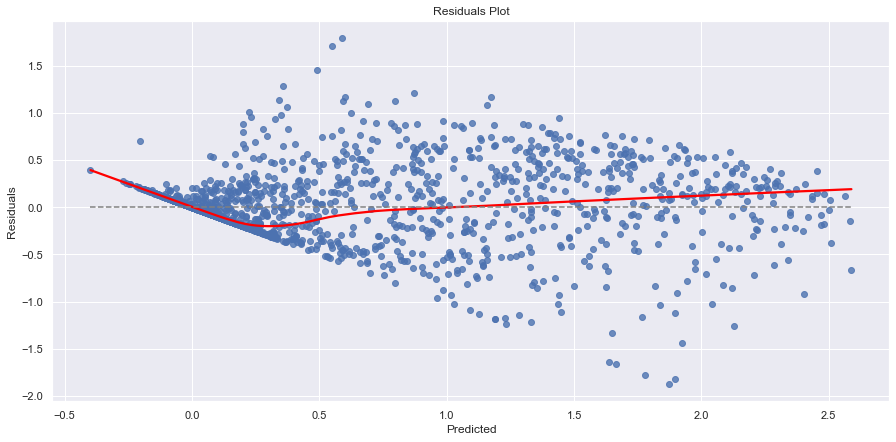

In [117]:
residuals = y_test - y_predict

sns.regplot(y_predict, residuals, lowess=True, line_kws={'color': 'red'})
plt.plot([y_predict.min(), y_predict.max()], [0, 0], '--', color='grey')
plt.title("Residuals Plot")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

##### (2-2) Normality of residuals
- 잔차가 정규분포를 따른다는 가정
- Shapiro Test를 통해 확인할 수 있음.

In [118]:
scipy.stats.shapiro(residuals)

ShapiroResult(statistic=0.919102132320404, pvalue=1.0276566580990314e-31)

##### (2-3) Equivariance of residuals
- 회귀모형을 통해 예측된 값이 크던 작던, 모든 값을에 대하여 잔차의 분산이 동일하다는 가정
- 아래 그래프는 예측값(가로축)에 따라 잔차가 어떻게 달라지는지 보여줌.
- 빨간색 실선이 수평선을 그리는 것이 이상적임.

C:\Users\mazy4\anaconda3\envs\Energy_Analysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


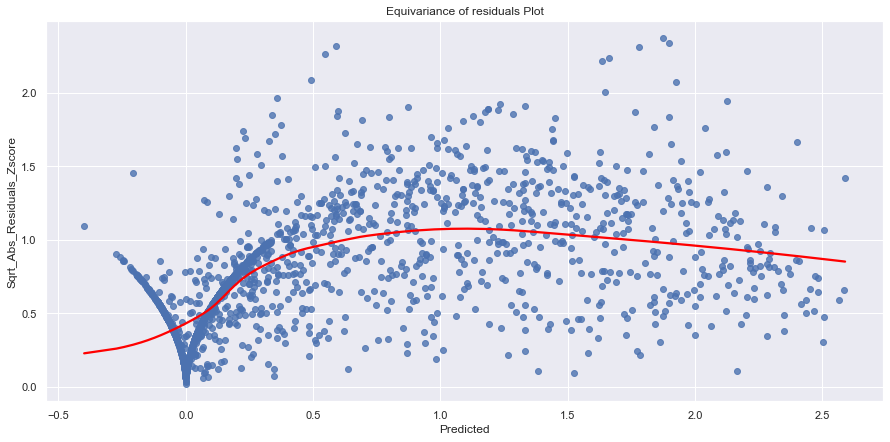

In [119]:
sr = scipy.stats.zscore(residuals)
sns.regplot(y_predict, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})
plt.title("Equivariance of residuals Plot")
plt.xlabel("Predicted")
plt.ylabel("Sqrt_Abs_Residuals_Zscore")
plt.show()

<hr>

#### **3. Conclusion**

**1. Estimated results**
- '그리드 소비(kWh)', '수출 된 에너지(kWh)', '에너지 수율(kWh)' 중 '에너지 수율(kWh)'의 결과가 가장 잘 나왔으며, 이는 당연한 결과라고 여겨진다.
- '에너지 수율(kWh)'는 곧 태양광 발전량을 의미하므로, 기후와 연관성이 상당히 깊기 때문으로 보여진다.
- '수출 된 에너지(kWh)'는 자가 발전 전력 중 자가 소비되지 않고 계통에 공급된 전력량을 의미하므로, 이 또한 '에너지 수율(kWh)'과의 연관성이 깊기에 결과가 나름 잘 나온 것으로 풀이된다.
- '그리드 소비(kWh)'는 기후와의 연관성이 거의 없기에, 다른 방안을 통한 추정이 필요할 것으로 고려된다.

**2. Independent variables(x)**
- x축 풍속, y축 풍속, 상대습도, 절대습도, 강수량은 큰 의미를 가진 변수라고 보기 어려워 보인다.
- 현 분석은 변수들을 최대한 활용하여 결과를 확인하고자 했던 목적이었으며, 차후 분석에서는 위 변수들을 제거할 계획이다.
- 시정은 그룹화를 진행하면 좋을 것으로 판단된다.